# **Practical Work 2 - Exercise 3**

Made by: Hugo Cisneros, Javier de Santos, Alicia García and Fernando Teba.

In [ ]:
#!pip install tensorflow
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 38.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=f0073332d881a0a34f83e8ef5fa5580e1219405f8a04c26739678189c498a967
  Stored in directory: /tmp/pip-ephem-wheel-cache-w36vvyxq/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5718183f1dfd9866b54f0da8f101ee84fdb57ea7a3b5d8f47712fcf67dd3ea99
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython
import tensorflow as tf

from mlxtend.plotting import plot_decision_regions
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

from pandas_profiling import ProfileReport

## **Functions used in this notebook**

In [ ]:
def build_model(hidden_layers=1, learning_rate=0.01, momentum=0.9, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='relu'))
    for _ in range(hidden_layers-1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(16, activation='sigmoid'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## **Step 1 - Environment Preparation**

In [ ]:
# Cargar el conjunto de datos
file_path = 'heart_attack.csv'  # Actualiza esta ruta
dataset3 = pd.read_csv("/content/heart_attack.csv",delimiter=';')
dataset3

,id,gender,age,hypertension,coronary_heart_disease,married,job,residence,glucose_level,bmi,tobacco_use,heart_attack
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,Former smoker,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,Never,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,Never,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,Smoker,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,Never,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,Never,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,Never,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,Never,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,Former smoker,0


In [ ]:
print(dataset3.columns)

Index(['id', 'gender', 'age', 'hypertension', 'coronary_heart_disease',
       'married', 'job', 'residence', 'glucose_level', 'bmi', 'tobacco_use',
       'heart_attack'],
      dtype='object')


In [ ]:
print(dataset3.isnull().sum()) #check empty instances

id                          0
gender                      0
age                         0
hypertension                0
coronary_heart_disease      0
married                     0
job                         0
residence                   0
glucose_level               0
bmi                       201
tobacco_use                 0
heart_attack                0
dtype: int64


In [ ]:
# deleting empty instances in bmi
dataset3.dropna(subset=['bmi'], inplace=True)
# deleting duplicated instances
dataset3.drop_duplicates(inplace=True)

#scale age, glucose_level and bmi
label_encoder = LabelEncoder()

#categorical columns transformation for better manipulation
dataset3["gender"] = label_encoder.fit_transform(dataset3["gender"])
dataset3["married"] = label_encoder.fit_transform(dataset3["married"])
dataset3["job"] = label_encoder.fit_transform(dataset3["job"])
dataset3["residence"] = label_encoder.fit_transform(dataset3["residence"])
dataset3["tobacco_use"] = label_encoder.fit_transform(dataset3["tobacco_use"])

dataset3

,id,gender,age,hypertension,coronary_heart_disease,married,job,residence,glucose_level,bmi,tobacco_use,heart_attack
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,1,0,103.08,18.6,3,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,1,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,0,0


In [ ]:
print(dataset3.columns)

Index(['id', 'gender', 'age', 'hypertension', 'coronary_heart_disease',
       'married', 'job', 'residence', 'glucose_level', 'bmi', 'tobacco_use',
       'heart_attack'],
      dtype='object')


In [ ]:
X = dataset3.drop('heart_attack', axis=1).values  #'heart_attack' is our objective column
y = dataset3['heart_attack'].values

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=16)
y_test = keras.utils.to_categorical(y_test, num_classes=16)
y_valid = keras.utils.to_categorical(y_valid, num_classes=16)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(2945, 11)
(982, 11)
(2945, 16)
(982, 16)
(982, 11)
(982, 16)


## **Step 2 - Training**

In [ ]:
config1 = {
    'hidden_layers': 4,
    'learning_rate': 0.001,
    'momentum': 0.9,
    'neurons': 128
}

config2 = {
    'hidden_layers': 5,
    'learning_rate': 0.01,
    'momentum': 0.95,
    'neurons': 16
}

config3 = {
    'hidden_layers': 3,
    'learning_rate': 0.0001,
    'momentum': 0.5,
    'neurons': 64
}

In [ ]:
best_model = None
best_accuracy = 0.0

for config in [config1, config2, config3]:
    print(config)
    model = build_model(**config)

    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=32, verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

    loss_val, accuracy_val = model.evaluate(X_valid, y_valid) # It calculates the loss and accuracy for the validation dataset.
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_model = model

{'hidden_layers': 4, 'learning_rate': 0.001, 'momentum': 0.9, 'neurons': 128}
Epoch 1/100
93/93 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.9219 - val_loss: nan - val_accuracy: 0.9593
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan - val_accuracy: 0.9593
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan - val_accuracy: 0.9593
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan - val_accuracy: 0.9593
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan - val_accuracy: 0.9593
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan - val_accuracy: 0.9593
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9606 - val_loss: nan 

31/31 [==============================] - 0s 2ms/step


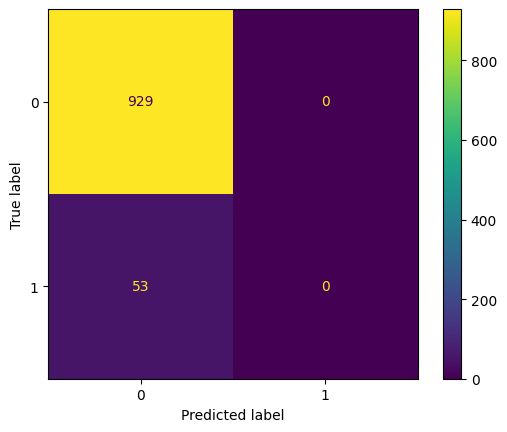

0.9592667818069458


In [ ]:
#correlation matrix
y_pred = best_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(best_accuracy)

In [ ]:
#EDA
profile = ProfileReport(
    dataset3,
    title = "Heart attack",
    html  = {'style': {'full_width': True}},
    sort  = None)
profile.to_file(output_file='output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
IPython.display.HTML(filename='output.html')

Number of variables,12
Number of observations,4909
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,0
Duplicate rows (%),0.0%
Total size in memory,498.6 KiB
Average record size in memory,104.0 B
Numeric,4
Categorical,8
age is highly overall correlated with job and 1 other fields,High correlation


In [ ]:
#coorelation matrix conducted for 3.4 being more specific that the EDA
corr_matrix = dataset3.corr()

corr_with_target = corr_matrix['heart_attack'].abs().sort_values(ascending=False)

print(corr_with_target)

heart_attack              1.000000
age                       0.232331
hypertension              0.142515
glucose_level             0.138936
coronary_heart_disease    0.137938
married                   0.105089
tobacco_use               0.075920
job                       0.049692
bmi                       0.042374
gender                    0.006757
residence                 0.006031
id                        0.004839
Name: heart_attack, dtype: float64
